In [6]:
# import library yang diperlukan
import networkx as nx
import matplotlib.pyplot as plt
import random
import numpy as np
import collections

In [7]:

# prediksi banyaknya edge: p x N x (N - 1) / 2
def pred_banyak_edge(p, N):
	return (p * N * (N - 1)) / 2



banyaknya edge                 = 4
edge complete graph            = 45.0
rasio                          = 0.08888888888888889
probabilitas p                 = 0.1
Banyak node                    = 10
Prediksi banyak edge           = 4.5
Aktual banyak edge             = 4
Simpul pada graph beserta derajat masing masing
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 0, 0, 0, 3, 1, 2, 0, 1, 1]
total derajat simpul           = 8
rata rata derajat simpul <k>   = 0.8
Ukuran masing masing   cluster = [5, 1, 1, 1, 1, 1]
komponen cluster terbesar      = 5
graph tidak terhubung
jenis random network           :
Subcritical Regime 


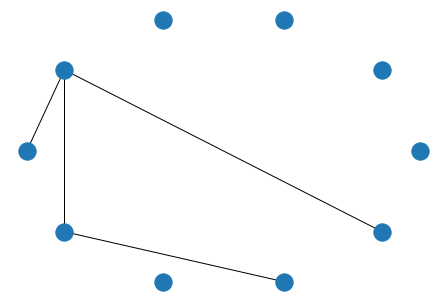

In [23]:
p = 0.1                # probabilitas p  (rentang 0 - 1)
n = 10                  # banyaknya node 
g = nx.Graph()          #inisialisasi graph 

# membuat node sejumlah n, masing masing terisolasi
for x in range (0, n):
	g.add_node(x)
# membuat graf dengan probabilitas p
n_edge=0
for x in range (0, n):
    for y in range (x, n):
        # tambahkan edge dengan probabolitas  p; bika p=1, tambahkan edge untuk setiap pasang node
        # serta x!=y
        if (random.random() < p  or p == 1.0) & (x != y):
            g.add_edge(x, y)
            n_edge = n_edge+1
            
eps = 1e-9
edge_complete_graph = n*(n-1)/2
print("banyaknya edge                 = " + str(n_edge))
print("edge complete graph            = " + str(edge_complete_graph))
print("rasio                          = " + str(n_edge/edge_complete_graph))
print("probabilitas p                 = " + str(p))
print("Banyak node                    = " + str(g.number_of_nodes()))
print("Prediksi banyak edge           = " + str(pred_banyak_edge(p, n)))
print("Aktual banyak edge             = " + str(g.number_of_edges()))
print("Simpul pada graph beserta derajat masing masing")
print(g.nodes())
print([g.degree(n) for n in g.nodes()])
degree_total=2*g.number_of_edges()
degree_rerata =degree_total/n
print("total derajat simpul           = " + str(degree_total))
print("rata rata derajat simpul <k>   = " + str(degree_rerata))
components = [comp for comp in nx.connected_components(g)]
component_size = [len(comp) for comp in components]
component_size.sort(reverse=True)
print("Ukuran masing masing   cluster = " + str(component_size))
print("komponen cluster terbesar      = " + str(max(component_size)))

if(nx.is_connected(g)):
    print("graph terhubung")
else :
    print("graph tidak terhubung")
    
print("jenis random network           :")
if (degree_rerata == 0) :
    print("disconnected")
elif (degree_rerata <1-eps) :
    print("Subcritical Regime ")
elif (degree_rerata <1+eps) :
    print("critical point ")
elif (degree_rerata <=np.log(n)) :
    print("supercritical regime ")
else:
    print("connected ")


# gambarkan networknya
nx.draw(g, pos=nx.circular_layout(g))
plt.show()

[Text(3, 0, '3'), Text(2, 0, '2'), Text(1, 0, '1'), Text(0, 0, '0')]

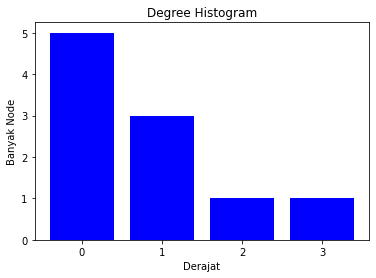

In [24]:
degree_sequence = sorted([d for n, d in g.degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color="b")

plt.title("Degree Histogram")
plt.ylabel("Banyak Node")
plt.xlabel("Derajat")
ax.set_xticks([d for d in deg])
ax.set_xticklabels(deg)